In this notebook, we check for outliers visually and mathematically. 

In [4]:
##Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [5]:
##Loading the pre-split dataset
df_train = pd.read_csv("../../data/train_set.csv")

In [7]:
#preprocessing and cleaning
df_train['DoctorInCharge'].unique()
df_train = df_train.drop(columns=['DoctorInCharge'])


Since the column `DoctorInCharge` has only one value, namely 'XXXConfid', this column does not give us any useful information. We can therefore dropped this column.

Of the remaining columns, it is not meaningful to look for outliers in features like `PatientID` or categorical variables like `Gender`, `Ethnicity`, `EducationLevel`, `Diagnosis`, etc.

In [8]:
excluded_columns = ['PatientID', 'Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
                    'FamilyHistoryAlzheimers', 'CardiovascularDisease','Diabetes', 'Depression', 
                    'HeadInjury', 'Hypertension', 'MemoryComplaints', 'BehavioralProblems', 
                    'Confusion', 'Disorientation', 'PersonalityChanges', 
                    'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

columns_to_check = [col for col in df_train.columns if col not in excluded_columns]

#### **Visual Detection: Box Plot Visualization**

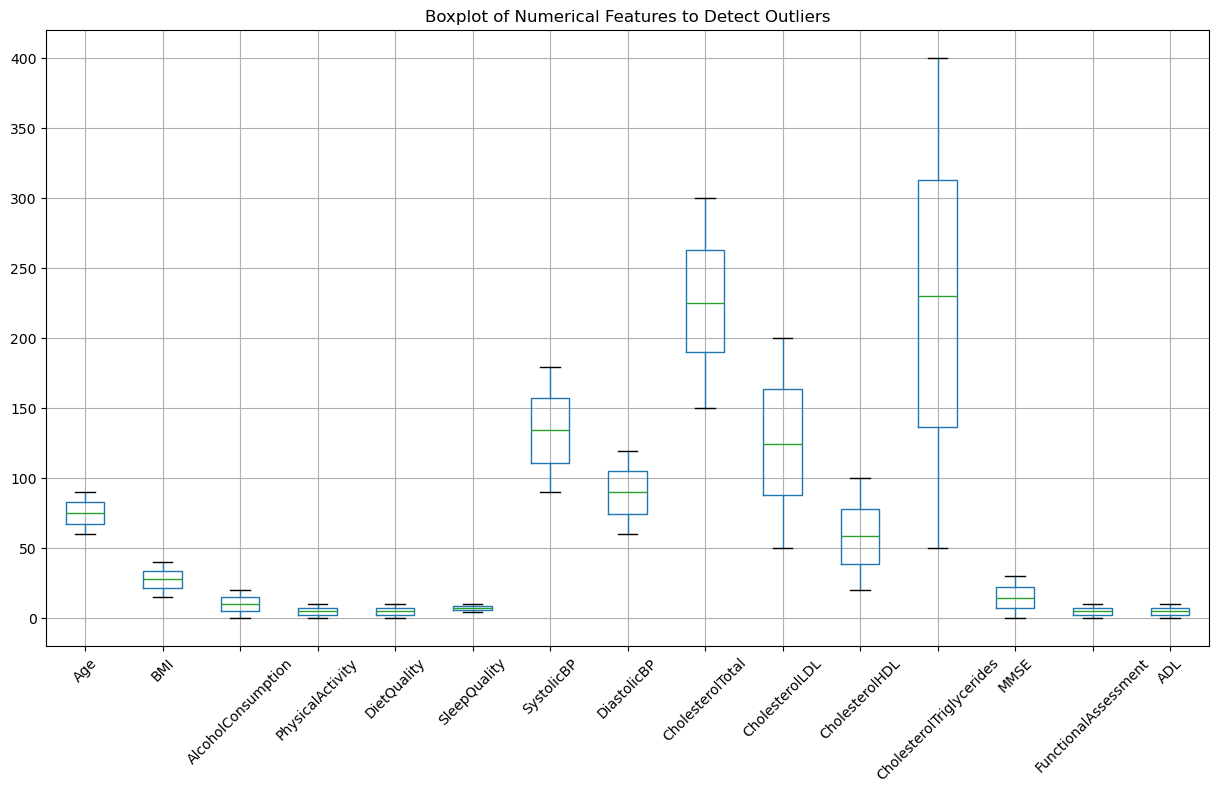

In [9]:
plt.figure(figsize=(15, 8))
df_train[columns_to_check].boxplot(rot=45)
plt.title("Boxplot of Numerical Features to Detect Outliers")
plt.show()

#### **Using Statistics: Interquartlie Range (IQR) Analysis**

In [10]:
outliers = {}

for col in columns_to_check:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[col] = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)][col].values

for col, values in outliers.items():
    print(f"Outliers in {col}: {values}")

Outliers in Age: []
Outliers in BMI: []
Outliers in AlcoholConsumption: []
Outliers in PhysicalActivity: []
Outliers in DietQuality: []
Outliers in SleepQuality: []
Outliers in SystolicBP: []
Outliers in DiastolicBP: []
Outliers in CholesterolTotal: []
Outliers in CholesterolLDL: []
Outliers in CholesterolHDL: []
Outliers in CholesterolTriglycerides: []
Outliers in MMSE: []
Outliers in FunctionalAssessment: []
Outliers in ADL: []


### **Conclusion**

**There are no outliers in the dataset as proved visually and statistically.**